# Exercise: colour histograms

A colour histogram is a representation of the distribution of colours in an image. Given a discrete predefined colour space (e.g. red, green, blue), the colour histogram is obtained by counting the number of times each colour occurs in the image array. Histogram Intersection is a technique that can be used to match a pair of histograms.  

Given a pair of histograms, e.g. of an input image I and a model M, each containing n bins, the intersection of the histograms is defined to be
$∑_{i,j}min(I,M)$ where j ranges over each colour in the histograms. The result of the intersection of a model histogram with an image histogram is the number of pixels from the model that have corresponding pixels of the same colour in the image.

## Import and Load

In [1]:
#import modules and images
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import requests
from io import BytesIO

#generate random image from lorenpicsom
#image credit: https://picsum.photos/
url = 'https://picsum.photos/300/200'
response = requests.get(url)
imgI = np.asarray(Image.open(BytesIO(response.content)))
imgM = np.asarray(Image.open(BytesIO(response.content)))

#or you can use image of mine.
imgI = Image.open('assets/test_image_boat.jpg')
imgM = Image.open('assets/test_image_island.jpg')

(h,w) = imgI.size
imgI = np.asarray(imgI.resize((h//3,w//3), Image.ANTIALIAS))
imgM = np.asarray(imgM.resize((h//3,w//3), Image.ANTIALIAS))

In [2]:
def plot(imgs, titles=[]):
    fig, axs = plt.subplots(1, len(imgs), figsize=(20, 20))
    i=0
    for ax, theta in zip(axs, imgs):
        ax.imshow(np.clip(theta,0,255))       
        if titles: ax.title.set_text(titles[i])
        i=i+1              
    plt.show()

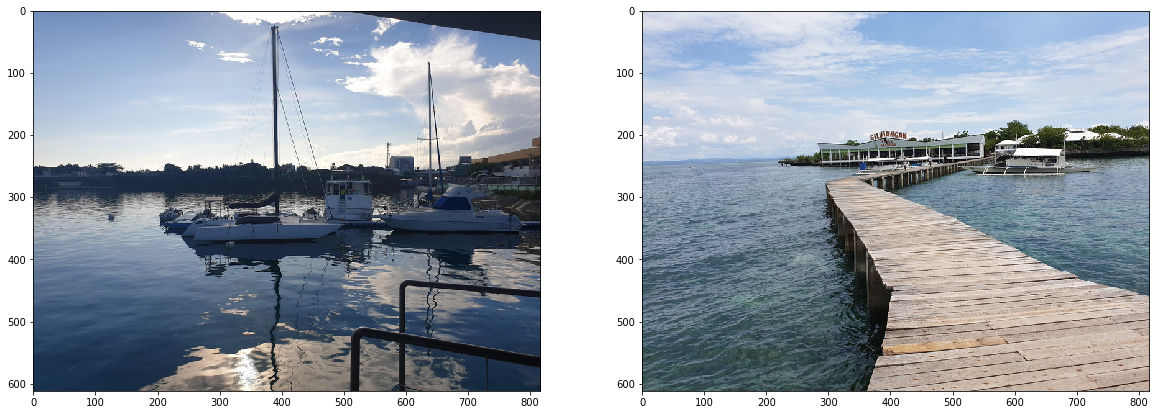

In [3]:
plot([imgI,imgM])

>a) Write a histogram function that returns the 3D colour histogram of an input image. Visualize the 3D histogram and save the figure(s). For a given video sequence, use the above function to construct and visualise the histograms of each frame.
Exercise: colour histograms

In [4]:
bins=16

In [5]:
def Histogram3d(img):
    # hist3d: output 3d histogram, shape=(bins,bins,bins) for (R,G,B)
    hist3d=np.zeros((bins,bins,bins),dtype=np.int)
    step = 256/bins
    
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            
            bin = list(map(int,img[y,x]//step))
            hist3d[bin] += 1
            
    return hist3d

In [6]:
import colorsys
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

def plot3dhistRGB(img):
    [xs, ys] = img.shape[1], img.shape[0]
    pixels = {}
    r_, g_, b_, colours = [],[],[],[]
    
    step = 256/bins
    for x in range(0, xs):
      for y in range(0, ys):
        [r, g, b] = img[y, x]

        r_.append(r//step)
        g_.append(g//step)
        b_.append(b//step)
        colours.append([r/255, g/255, b/255])

    hist_bins= Histogram3d(img)
    hist_positive = hist_bins > 0.0
    color_densities = np.float32(hist_bins[hist_positive])

    density_max = np.max(color_densities)
    color_densities = 20*color_densities / density_max
    
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(r_, g_, b_, s=color_densities,c=colours, lw=0)
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    fig.add_axes(ax)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(img)

    plt.show()   

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


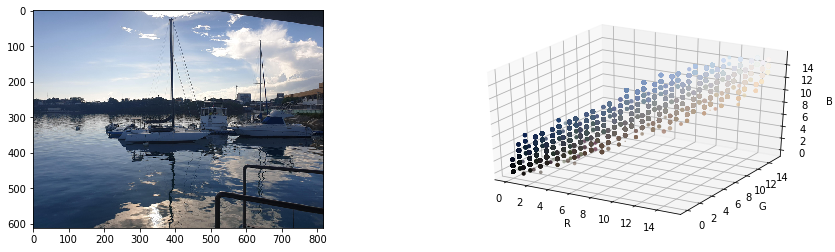

In [7]:
plot3dhistRGB(imgI)

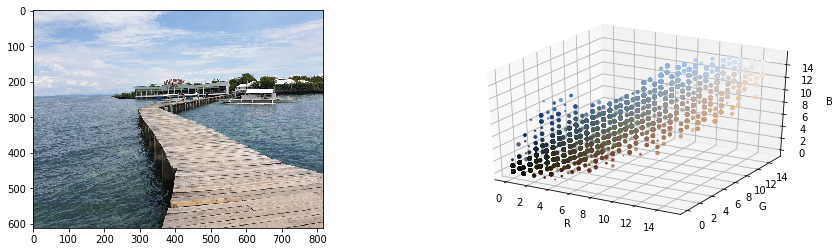

In [8]:
plot3dhistRGB(imgM)

In [23]:
def hist_intersection(hist1,hist2):    
    
    histIntersection = np.minimum(hist1,hist2)
    son = np.sum(histIntersection)
    mom = min(np.sum(hist1),np.sum(hist2))
    result = son / mom
    
    return result

In [10]:
histI = Histogram3d(imgI)
histM = Histogram3d(imgM)
hist_intersection(histI,histM)

0.7447848275714449

>b) Write a function that returns the intersection of a pair of histograms. For a given video sequence, use the histogram intersection function to calculate the intersection between the consecutive frames, e.g., between It and It+1, between It+1 and It+2 etc. Visualise and present the intersection values. Find a way to normalize the intersection. Does that cause any changes in the results?

I am going to establish the strategy to get the intesection of histogram between the consecutive frames.
1. split each frames into volume of numpy image arrays for given video sequence.  
~~~
input: video sequence  
output: np.ndarray[h,w,c,frames]
~~~

   
2. calculate the 3d histogram of each frames.
~~~
input: np.ndarray[h,w,c,frames]
output: np.ndarray[hist,c,frames]
~~~

   
3. calculate the intersection of a pair of histograms using simple matrix subtraction.
~~~ 
input: np.ndarray[hist,c,frames]
output: np.ndarray[hist,c,frames-1]
~~~

~~~
intersection of histogram = np.minimum(np.ndarray[hist,c,frames-1], np.ndarray[hist,c,frames])
~~~


Before we get started, Let's define the functuin to load video file and convert into np.array

In [11]:
# !apt-get install --no-install-recommends ffmpeg && pip install ffmpeg scikit-video
import skvideo.io
import skvideo.datasets
import imageio
from IPython.display import Video

# convert video sequence into np.array
video = skvideo.io.vread(skvideo.datasets.bigbuckbunny())
video = skvideo.io.vread('assets/test_video.mp4')
print(video.shape)

#Display video
Video('assets/test_video.mp4', width=480, height=360) 
#the width and height option as additional thing new in Ipython 7.6.1

(337, 720, 1280, 3)


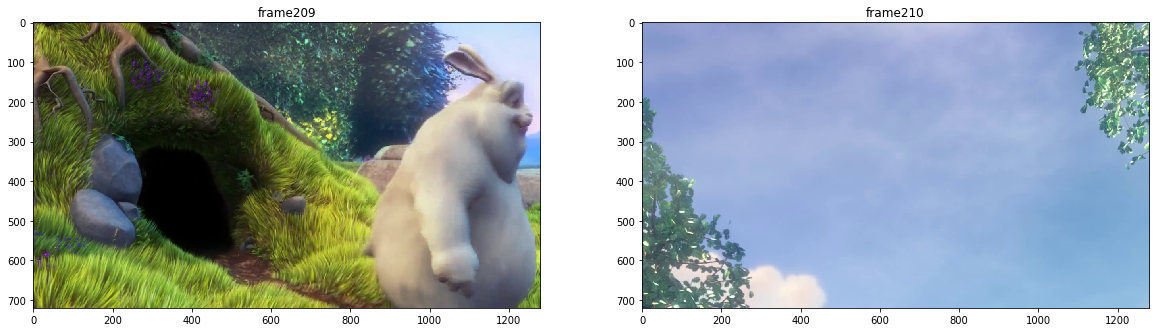

In [13]:
plot([video[209],video[210]],['frame209', 'frame210'])

In [ ]:
video_intersection = []
video_hist=[]

for frame in range(0,330):
    video_hist.append(Histogram3d(video[frame]))
    print("frame {} hist complete".format(frame))

frame 0 hist complete
frame 1 hist complete
frame 2 hist complete
frame 3 hist complete
frame 4 hist complete
frame 5 hist complete
frame 6 hist complete
frame 7 hist complete
frame 8 hist complete
frame 9 hist complete
frame 10 hist complete
frame 11 hist complete
frame 12 hist complete
frame 13 hist complete
frame 14 hist complete
frame 15 hist complete
frame 16 hist complete
frame 17 hist complete
frame 18 hist complete
frame 19 hist complete
frame 20 hist complete
frame 21 hist complete
frame 22 hist complete
frame 23 hist complete
frame 24 hist complete
frame 25 hist complete
frame 26 hist complete
frame 27 hist complete
frame 28 hist complete
frame 29 hist complete
frame 30 hist complete
frame 31 hist complete
frame 32 hist complete
frame 33 hist complete
frame 34 hist complete
frame 35 hist complete
frame 36 hist complete
frame 37 hist complete
frame 38 hist complete
frame 39 hist complete
frame 40 hist complete
frame 41 hist complete
frame 42 hist complete
frame 43 hist complet

In [24]:
for frame in range(len(video_hist)-1):
    inter = hist_intersection(video_hist[frame],video_hist[frame+1])
    video_intersection.append(inter)

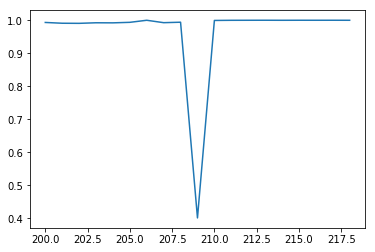

[200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218]

In [30]:
x=[i for i in range(200,219)]
plt.plot(x, video_intersection)
plt.show()


>c) What does the intersection value represent for a given input video? Can you use it to make a decision about where the scene in the video changes? How robust is the histogram intersection technique to changes? Where does it fail? What would be other application areas where histogram calculation and histogram intersection can be used?

Intersection value represents the similarity of colour information that contains in each frame. Therefore, if the intersection value is high the two frame may consecutive sequence in same scene. On the other hands, if the intersection value is low the tow frame is different scene. So we cans use this analysis method to segment the scene. We can divide the scene by selecting zero intersection value as scene-changing frame. However, though this method is robust to change in dynamic scene changes, it cannot segment the minimal scene changes such as camera switch in same scene. And this methods is too sensitive in lighting condition in same scene. rapid changes in same scene such as car incoming with its head lights on may be segmented as diferrent scene with this method. 

The most useful histogram intersection method can be used in video compression application. To compress the video, pixels with change from formal frame is saved. So histogram intersection analysis can be helpful to select the keyframes of the video.

### Deprecated Functions

In [ ]:
# plot in hsv
import colorsys

img = imgI
[xs, ys] = img.shape[1], img.shape[0]
max_intensity = 100
hues = {}

# (3) Examine each pixel in the image file
for x in range(0, xs):
  for y in range(0, ys):
    # (4)  Get the RGB color of the pixel
    [r, g, b] = img[y, x]

    # (5)  Normalize pixel color values
    r /= 255.0
    g /= 255.0
    b /= 255.0

    # (6)  Convert RGB color to HSV
    [h, s, v] = colorsys.rgb_to_hsv(r, g, b)

    # (7)  Marginalize s; count how many pixels have matching (h, v)
    if h not in hues:
      hues[h] = {}
    if v not in hues[h]:
      hues[h][v] = 1
    else:
      if hues[h][v] < max_intensity:
        hues[h][v] += 1

# (8)   Decompose the hues object into a set of one dimensional arrays we can use with matplotlib
h_ = []
v_ = []
i = []
colours = []

for h in hues:
  for v in hues[h]:
    h_.append(h)
    v_.append(v)
    i.append(hues[h][v])
    [r, g, b] = colorsys.hsv_to_rgb(h, 1, v)
    colours.append([r, g, b])

# (9)   Plot the graph!
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(h_, v_, i, s=5, c=colours, lw=0)

ax.set_xlabel('Hue')
ax.set_ylabel('Value')
ax.set_zlabel('Intensity')
fig.add_axes(ax)
plt.show()

In [30]:
import colorsys
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

def plot3dhistRGB(img):
    img = imgI
    [xs, ys] = img.shape[1], img.shape[0]
    pixels = {}
    r_, g_, b_, colours = [],[],[],[]
    
    for x in range(0, xs):
      for y in range(0, ys):
        [r, g, b] = img[y, x]

        r_.append(r)
        g_.append(g)
        b_.append(b)
        colours.append([r/255, g/255, b/255])

    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(r_, g_, b_, s=5,c=colours, lw=0)
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    fig.add_axes(ax)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(imgM)

    plt.show()   

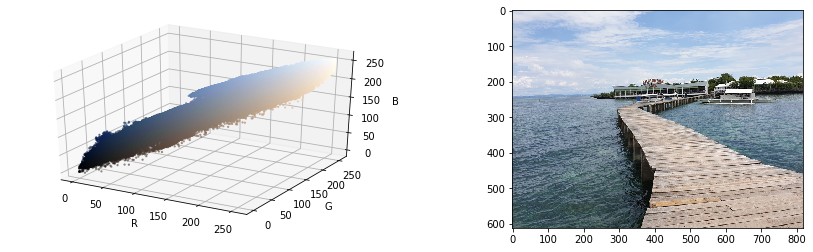

In [31]:
plot3dhistRGB(imgI)

In [13]:
import plotly.graph_objects as go
import mpl_toolkits.mplot3d.axes3d as p3


def plotHist3d(img):
    imgFlat = np.array([img[:,:,c].ravel() for c in range(3)])
    colorRGB=''
    fig = go.Figure(data=[go.Scatter3d(
        x=imgFlat[0],y=imgFlat[1],z=imgFlat[2],
        mode='markers',
        marker=dict(
            size=1,
            #color= 'rgb({}, {}, {})'.format(x/255,y/255,z/255) , #10,20,30)] ,# set color to an array/list of desired values
            #color = rgb(imgFlat[0],imgFlat[1],imgFlat[2]),
            #colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )])

    # tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

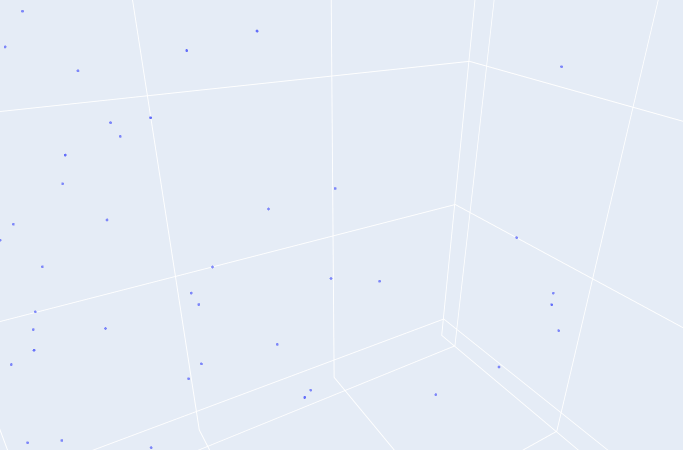

In [14]:
plotHist3d(imgI)

In [10]:
#TODO deprecated
import cv2

def plt_hist(img):
    color = ('b','g','r')
    fig = plt.figure(figsize=(15, 4)) 
    plt.subplot(121), plt.imshow(img)
    plt.subplot(122)
    for i,col in enumerate(color):
         histr = cv2.calcHist([img],[i],None,[256],[0,256])
         plt.plot(histr,color = col)
         plt.xlim([0,256])
    plt.show()

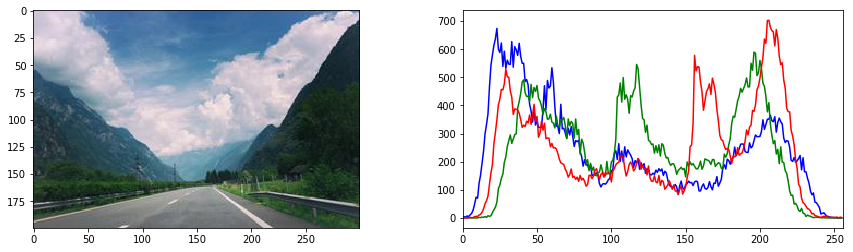

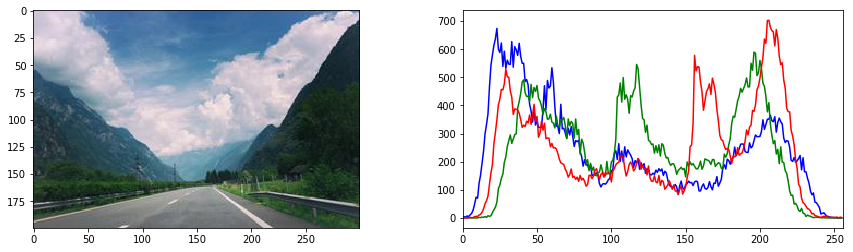

In [11]:
#TODO deprecated

histI=np.asarray([np.histogram(imgI[:,:,i], bins=255)[0] for i in range(3)])
histM=np.asarray([np.histogram(imgI[:,:,i], bins=255)[0] for i in range(3)])

plt_hist(imgI)
plt_hist(imgM)